In [1]:
from sklearn.datasets import make_classificationfication

In [7]:
from matplotlib import pyplot as plt

In [22]:
X,Y = make_classification(
    n_samples=400,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    shuffle=True,
    random_state=3,
)

In [19]:
X.shape,Y.shape

((400, 2), (400,))

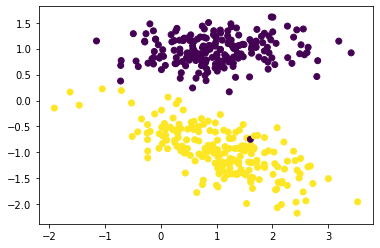

In [21]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [23]:
import numpy as np

In [25]:
Y[Y==0] = -1

In [27]:
np.unique(Y,return_counts=True)

(array([-1,  1]), array([201, 199], dtype=int64))

In [108]:
class SVM:
    def __init__(self,C=1.0):
        self.C = C
        self.W = None
        self.b = None
    
    def hingeLoss(self,X,Y):
        W,b = self.W,self.b
        
        loss = 0.5*np.dot(W.T,W)[0][0]
        
        m = X.shape[0]
        ti = Y.reshape((-1,1))*(np.dot(X,W) + b)
        ti[ti>1]=1
        loss += np.sum(self.C*(1-ti))
        return loss
    def fit(self,X,Y,batch_size,learning_rate=0.001,maxItr=200):
        f = X.shape[1]
        m = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        self.W = np.zeros((f,1))
        self.b = 0 
        W,b = self.W,self.b
        
        losses = []
        for i in range(maxItr):
            
            indices = np.arange(m)
            np.random.shuffle(indices)
            l = self.hingeLoss(X,Y)
            losses.append(l)
            
            for batch_start in range(0,m,batch_size):
                gradw = 0
                gradb = 0
                
                for j in range(batch_start,batch_start+batch_size):
                    if j<m:
                        idx = indices[j]
                        ti = Y[idx]*(np.dot(X[idx].reshape(1,-1),W)+b)[0]
                        
                        if ti>=1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[idx]*X[idx].reshape(-1,1)
                            gradb += c*Y[idx]
                            #print(gradw)
                W = W - n*W + n*gradw
                b = b + n*gradb
                self.W = W
                self.b = b
                
        self.W = W
        self.b = b
        self.losslist = losses
        return W,b

                        
        

In [160]:
mySVM = SVM(C=10)

In [155]:
w1,b1 = mySVM.fit(X,Y,32,maxItr=50)

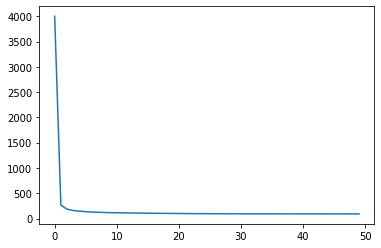

In [156]:
loss = mySVM.losslist
plt.plot(loss)
plt.show()

In [164]:
def visualiseHyperplane(w1,w2,b):
    
    plt.figure(figsize=(20,20))
    x_1 = np.linspace(-2,4,5)
    x_2 = -(w1*x_1 + b)/w2
    pos_plane =   -(w1*x_1 + b+1)/w2
    neg_plane =  -(w1*x_1 + b-1)/w2
    
    plt.plot(x_1,x_2,label="Hyperplane")
    plt.plot(x_1,pos_plane,label="+ve Hyperplane")
    plt.plot(x_1,neg_plane,label="-ve Hyperplane")
    
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.legend()


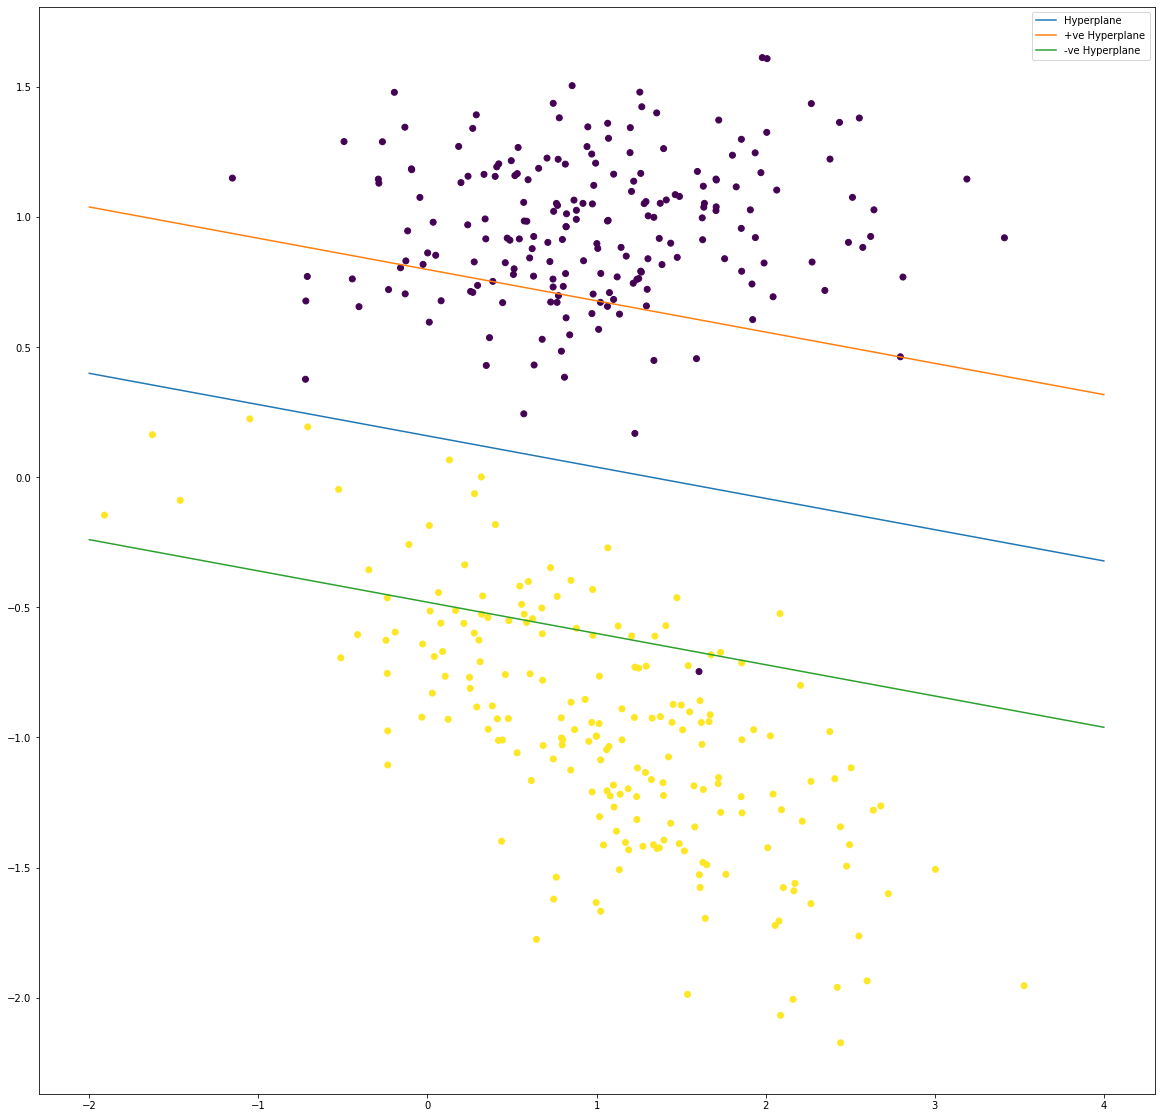

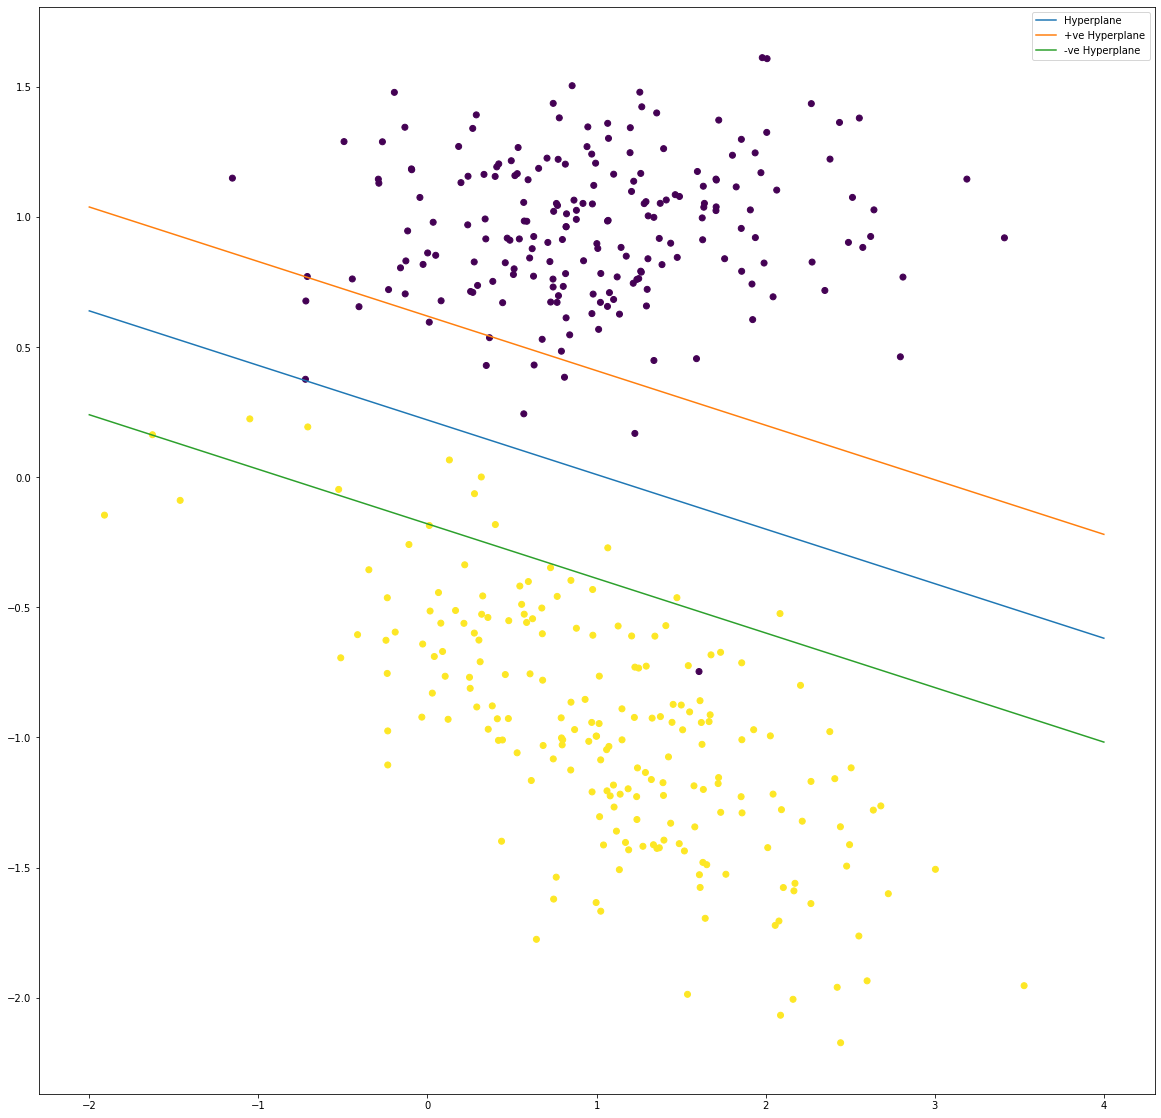

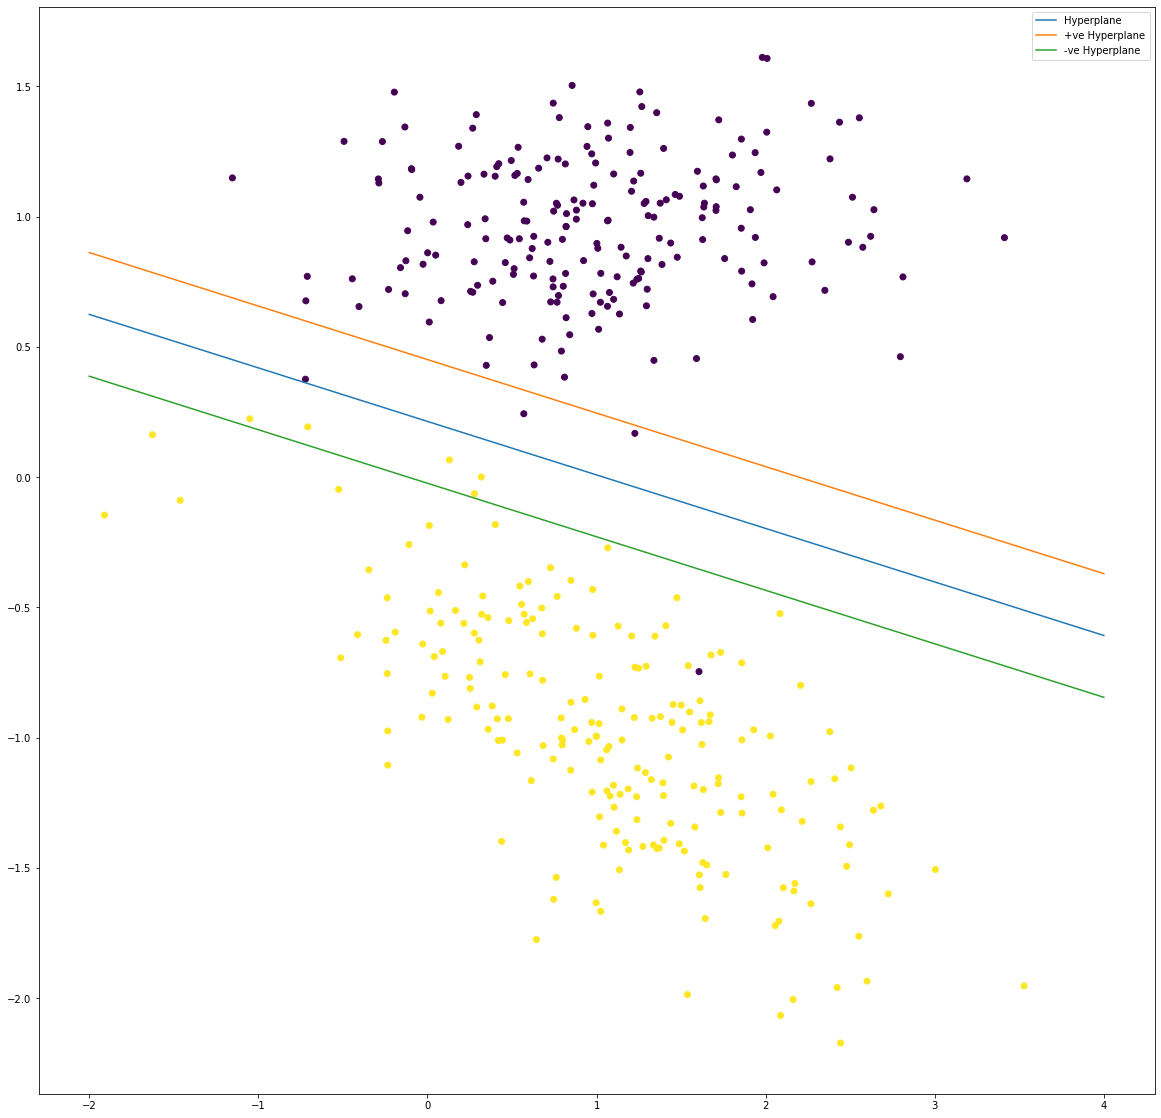

In [165]:
C = [1,10,100]

for c in C:
    s = SVM(C=c)
    s.fit(X,Y,batch_size=20)
    w,b = s.W,s.b
    visualiseHyperplane(w[0,0],w[1,0],b)

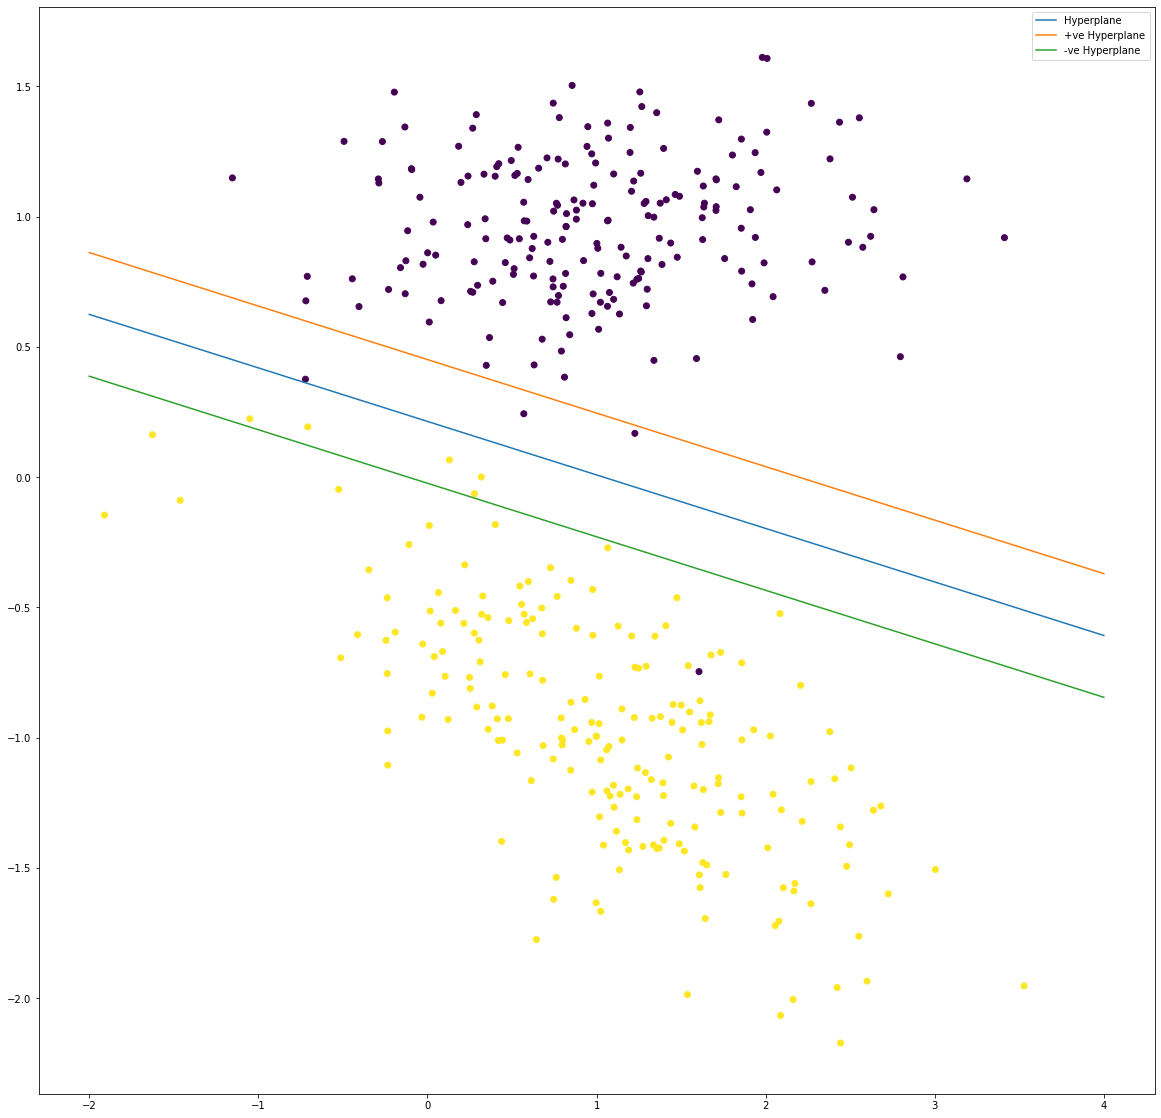

In [166]:
visualiseHyperplane(w[0,0],w[1,0],b)